# HOMWORK1
# COMBINE WEEK05 WEEK08

## DATA:
 Adolescent mental health dataset using Kaggle. Data source: https://www.kaggle.com/datasets/aniruddhawankhede/mental-heath-analysis-among-teenagers/data
 
 Method source:https://github.com/evrial/PCA-dimensionality-reduction

## Methods:
 Including data visualisation, correlation analysis, PCA dimensionality reduction, KMeans clustering and linear regression experiments

## OBJECTIVE: 
To analyse the relationship between adolescent mental health and variables such as social media use, sleep duration, and exercise time.

## Output: 
### Data visualisation
Scatterplot: Social_Media_Hours vs Sleep_Hours + regression line.
Composite box plot: show data distribution.

### Correlation Analysis
Pearson correlation coefficient: Social_Media_Hours vs Sleep_Hours.
Correlation Matrix: Heatmap showing the correlation of all numerical features.

### Cluster Analysis

KMeans clustering results: 5 clusters and their centroids.
Cluster visualisation: 2D cluster map after PCA dimensionality reduction.
Cluster Feature Means: Histogram showing key feature means for each cluster.

### Dimension Reduction Analysis
PCA Dimension Reduction: Project data onto a 2D plane and visualise.

### Regression Analysis
Linear regression model: feature coefficients and predicted results.

### Statistical Tables
Cluster statistics table: sample statistics for each cluster.
Feature-Cluster Relationship Table: Cluster means for key features.

### Model Evaluation
R² value: goodness of fit of the regression model.
Translated with DeepL.com (free version)

In [34]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## The Dataest
This dataset is designed to analyze mental health patterns in teenagers, focusing on stress levels using anonymized data from social media activity, surveys, and wearable devices. I'm curious about the correlation between adolescent mental health and multiple variables (e.g., social media use, sleep duration, exercise time, etc.)

In [35]:
#Read in csv
df = pd.read_csv("data/mental_health_analysis.csv")
# df
# df.columns
# df.describe()
# df.isna().any()

使用``pandas``与``matplotlib.pyplot``生成散点图

[[9.65448635 5.19892552]
 [9.15814348 8.86609666]
 [5.0287552  4.94309483]
 ...
 [3.44438288 9.22772581]
 [7.86652516 4.31783065]
 [3.3893622  8.69317051]]
[9.65448635 9.15814348 5.0287552  ... 3.44438288 7.86652516 3.3893622 ] [5.19892552 8.86609666 4.94309483 ... 9.22772581 4.31783065 8.69317051]


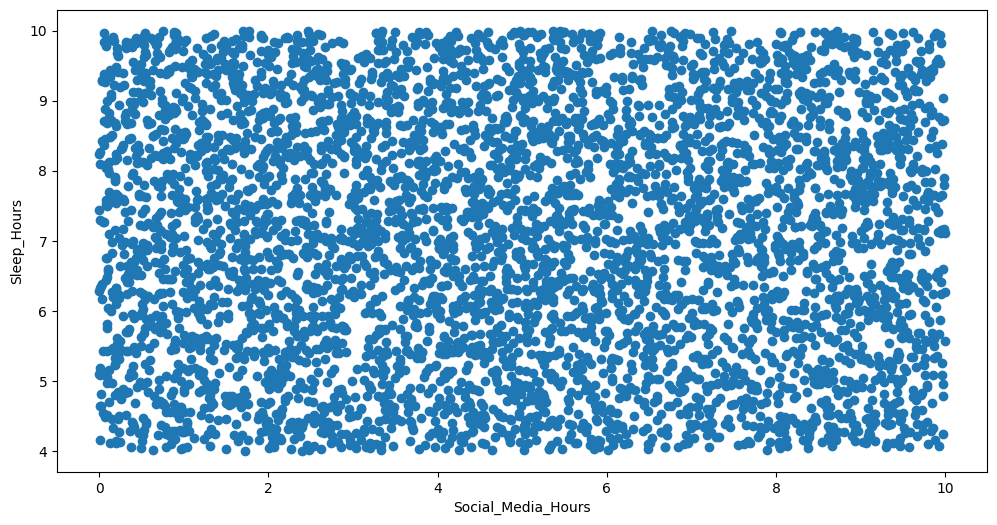

In [67]:
# User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
#
data = df[["Social_Media_Hours","Sleep_Hours"]].values
print(data)
x = data[:,0]
y = data[:,1]
print(x, y)

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Social_Media_Hours","Sleep_Hours")

``pandas numpy matplotlib.pyplot scipy.stats``Calculate Pearson's correlation coefficient between social media use time and sleep time and generate multiple linear plots

-0.012947021958185307


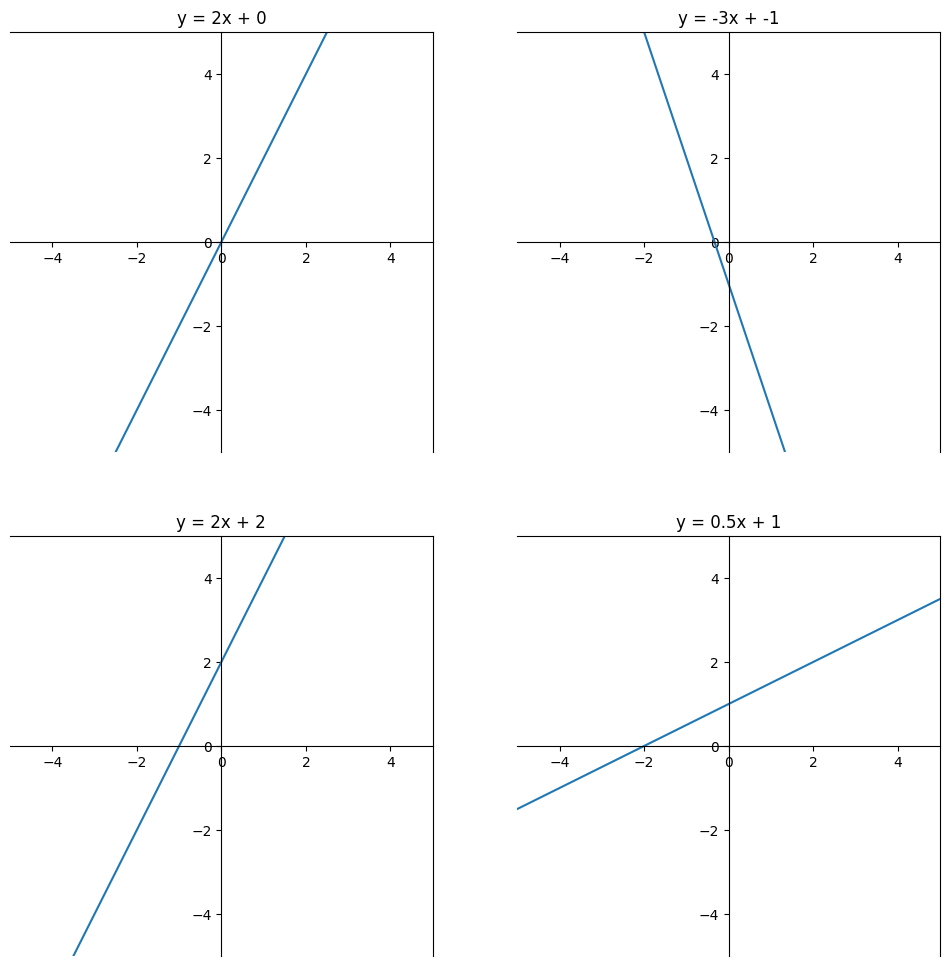

In [68]:
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
print(r)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
def plot_line(a,b,ax):
    x = np.linspace(0,10,100) - 5
    y = [(a * i) + b for i in x]
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.set_ylim([-5,5])
    ax.set_xlim([-5,5])
    ax.set_title("y = " + str(a) + "x + " + str(b))
    ax.plot(x,y)

plot_line(2,0,ax[0][0])
plot_line(2,2,ax[1][0])
plot_line(0.5,1,ax[1][1])
plot_line(-3,-1,ax[0][1])

Linear regression parameters, including slope, intercept, correlation coefficient, p-value, and standard error, were calculated for the relationship between social media usage time and sleep time using the ``linregress`` function in the ``scipy.stats`` library.

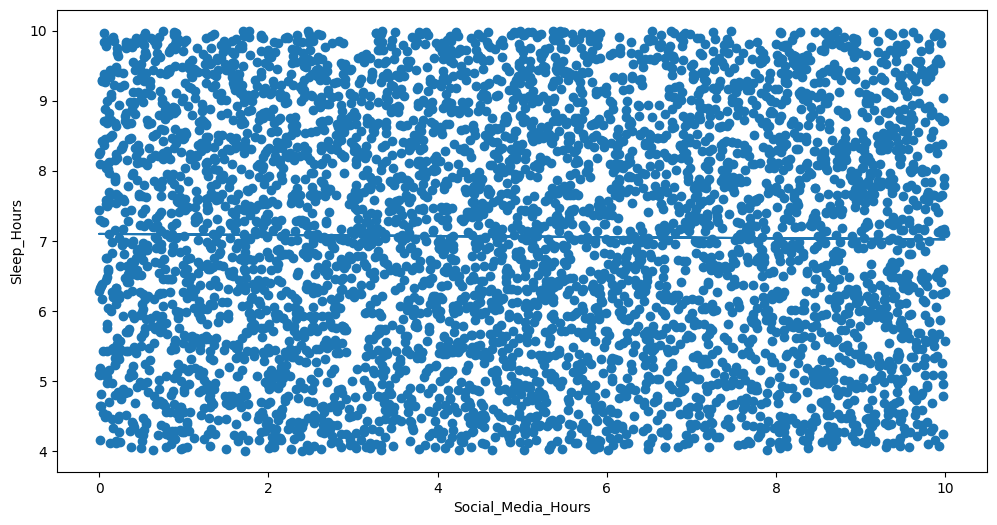

In [69]:
data = df[["Social_Media_Hours","Sleep_Hours"]].values

x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Social_Media_Hours","Sleep_Hours")
ax.plot(x, model_y)

In [70]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
User_ID,1.000000,-0.005040,0.012403,-0.006097,0.002007,-0.026936,-0.009274,-0.010344
Age,-0.005040,1.000000,-0.004568,0.017528,-0.009405,0.003238,0.013441,0.015578
Social_Media_Hours,0.012403,-0.004568,1.000000,-0.018806,-0.012947,0.010555,-0.003035,0.019506
Exercise_Hours,-0.006097,0.017528,-0.018806,1.000000,0.019300,-0.008320,0.002489,-0.009297
Sleep_Hours,0.002007,-0.009405,-0.012947,0.019300,1.000000,-0.002896,0.024097,-0.011803
Screen_Time_Hours,-0.026936,0.003238,0.010555,-0.008320,-0.002896,1.000000,-0.003991,-0.010748
Survey_Stress_Score,-0.009274,0.013441,-0.003035,0.002489,0.024097,-0.003991,1.000000,0.003994
Wearable_Stress_Score,-0.010344,0.015578,0.019506,-0.009297,-0.011803,-0.010748,0.003994,1.000000


Use the ``dropna()`` method to remove missing values from a data frame.
Mapping the Support System column. Maps the categorical values in the Support System column to numeric values, with ‘Low’ mapped to 0.0, ‘Moderate’ mapped to 1.0, and ‘High’ mapped to 2.0. ‘High’ is mapped to 2.0.

In [71]:
x = df
x = x.dropna()
x['Support_System'] = x['Support_System'].map({'Low': 0., 'Moderate': 1., 'High': 2.})
x_scaled = x.drop("User_ID", axis = 1)
x_scaled = x_scaled.drop("Age", axis = 1)
x_scaled = x_scaled.drop("Gender", axis = 1)
x_scaled = x_scaled.drop("Academic_Performance", axis = 1)
x_scaled

,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System
0,9.654486,2.458001,5.198926,8.158189,3,0.288962,1.0
1,9.158143,0.392095,8.866097,5.151993,5,0.409446,1.0
2,5.028755,0.520119,4.943095,9.209325,2,0.423837,1.0
3,7.951103,1.022630,5.262773,9.823658,5,0.666021,1.0
4,1.357459,1.225462,6.196080,11.338990,5,0.928060,2.0
...,...,...,...,...,...,...,...
4995,0.088148,1.003339,8.684888,5.922202,1,0.750205,1.0
4996,7.161276,1.024644,5.312684,10.224924,4,0.427209,1.0
4997,3.444383,2.877972,9.227726,4.059322,4,0.002893,2.0
4998,7.866525,2.395839,4.317831,10.657076,2,0.612063,2.0


In [72]:
x_scaled = StandardScaler().fit_transform(x_scaled)
x_scaled

array([[ 1.65486941,  1.09835642, -1.07921162, ..., -0.01116908,
        -0.71669835, -0.01230263],
       [ 1.48093631, -1.2656595 ,  1.05034024, ...,  1.40263795,
        -0.30086291, -0.01230263],
       [ 0.0338776 , -1.11916088, -1.22777429, ..., -0.71807259,
        -0.25119304, -0.01230263],
       ...,
       [-0.52133291,  1.57892843,  1.26034081, ...,  0.69573444,
        -1.70403012,  1.21796004],
       [ 1.02831539,  1.02722423, -1.59086956, ..., -0.71807259,
         0.39844482,  1.21796004],
       [-0.54061378, -0.14018188,  0.94992082, ...,  1.40263795,
         1.57398146, -0.01230263]], shape=(5000, 7))

In [73]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)
x_2d

array([[ 0.72030835, -0.52201579],
       [ 0.18084992,  0.36293583],
       [ 1.46972594, -0.45265392],
       ...,
       [-2.78075173,  0.27931166],
       [ 1.27078403,  0.24904866],
       [-0.62964278,  1.03609256]], shape=(5000, 2))

(array([ 0.72030835,  0.18084992,  1.46972594, ..., -2.78075173,
         1.27078403, -0.62964278], shape=(5000,)),
 array([-0.52201579,  0.36293583, -0.45265392, ...,  0.27931166,
         0.24904866,  1.03609256], shape=(5000,)))

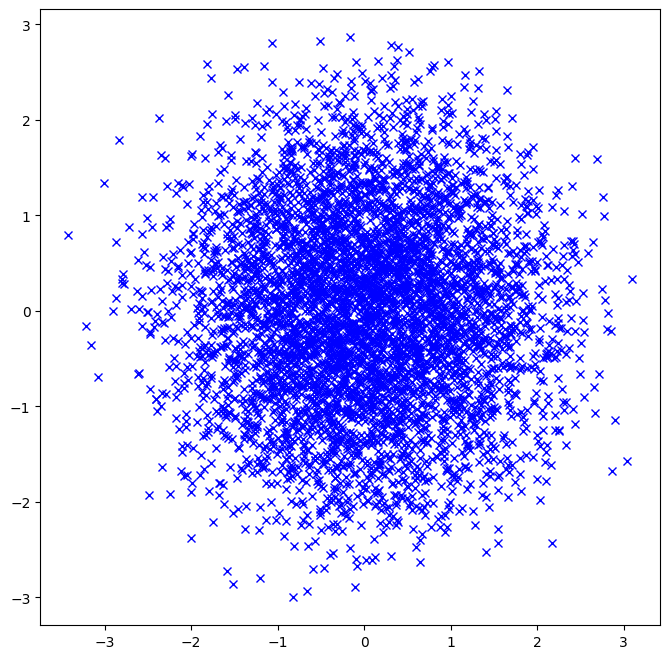

In [75]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")
x_2d[:,0], x_2d[:,1]

Fit the KMeans model using different number of clusters (from 1 to 19).
Calculate the inertia score for each number of clusters and store it in the scores list.
Plot the inertia scores in order to determine the optimal number of clusters using the elbow method.

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    print(clusterer.cluster_centers_)
    plot_centroids(clusterer.cluster_centers_)

[34999.99999999999, 31236.402829656283, 28923.647443307196, 27097.584931533616, 25553.288368750997, 24317.40201148491, 23173.753292879515, 22172.07057146961, 21500.72779011115, 20822.595984789485, 20265.666810567935, 19780.65034176672, 18998.62450489902, 18400.582469226203, 17989.837695533854, 17607.088159770603, 17376.170434279593, 17084.337123884885, 16674.972010167738]


([<matplotlib.axis.XTick at 0x2822b4c0eb0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

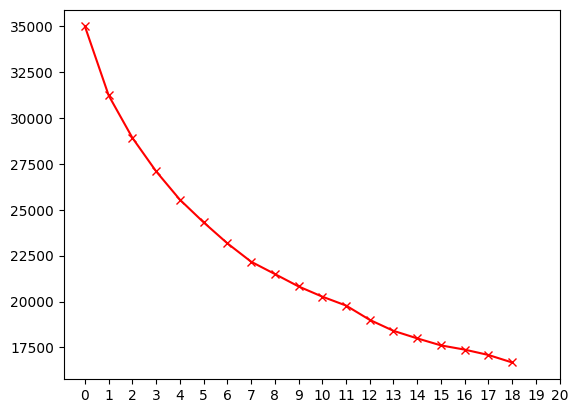

In [77]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
print("==========")
print(scores)
print("==========")
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

The data was classified into five clusters using the KMeans clustering algorithm and the clustering results were plotted on a PCA dimensionality reduced graph.

[[-0.41392694  0.28052545  0.91153513 -0.00955409  0.15854122  0.07415146
   0.82143871]
 [-0.51586104  0.136258   -0.20709882 -0.09545201 -0.89060734  0.25793121
  -0.84139269]
 [ 0.59875823 -0.3518933  -0.45566569  0.16360111 -0.79489387 -0.39596723
   0.66517744]
 [ 0.58576647 -0.11436623  0.53268333  0.08558423  0.62237006 -0.27932551
  -0.87384448]
 [-0.23030868  0.02121491 -0.92138493 -0.1466008   0.90510395  0.34760787
   0.26195975]]


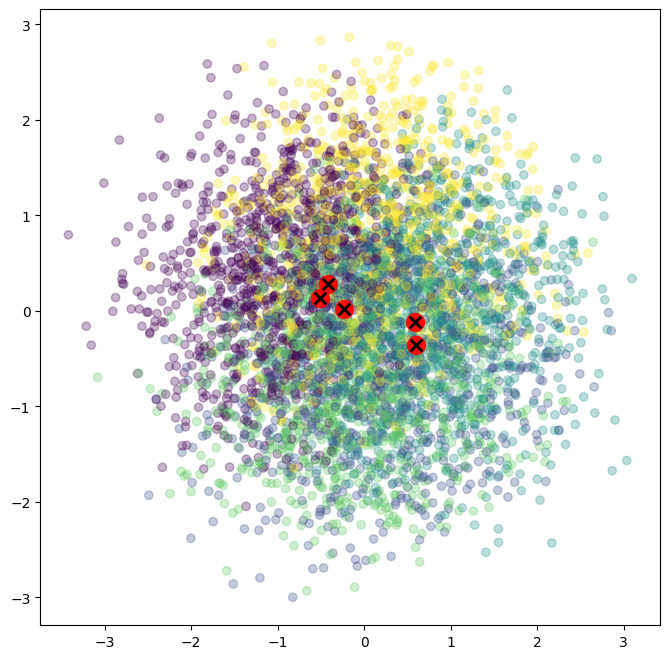

In [78]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

The data was downscaled to 2 dimensions using PCA and then the data was classified into 5 clusters using KMeans clustering algorithm and the clustering results were plotted on the downscaled graph.

[[-1.3730789   0.07767591]
 [ 1.40843886 -0.19071761]
 [ 0.02753038  0.10121264]
 [-0.14580367 -1.33509979]
 [ 0.12459052  1.41864186]]


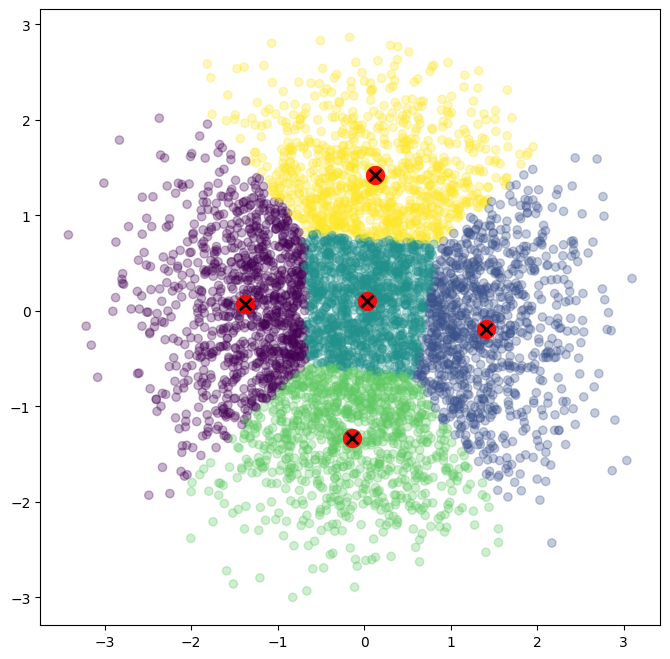

In [79]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

Cluster labels were added as additional columns in the data frame and the specified features for each cluster were plotted.

[1 2 1 ... 0 1 4] 5000


C:\Users\Dell\AppData\Local\Temp\ipykernel_17228\529807874.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('cool')


Text(0.5, 0, 'cluster number')

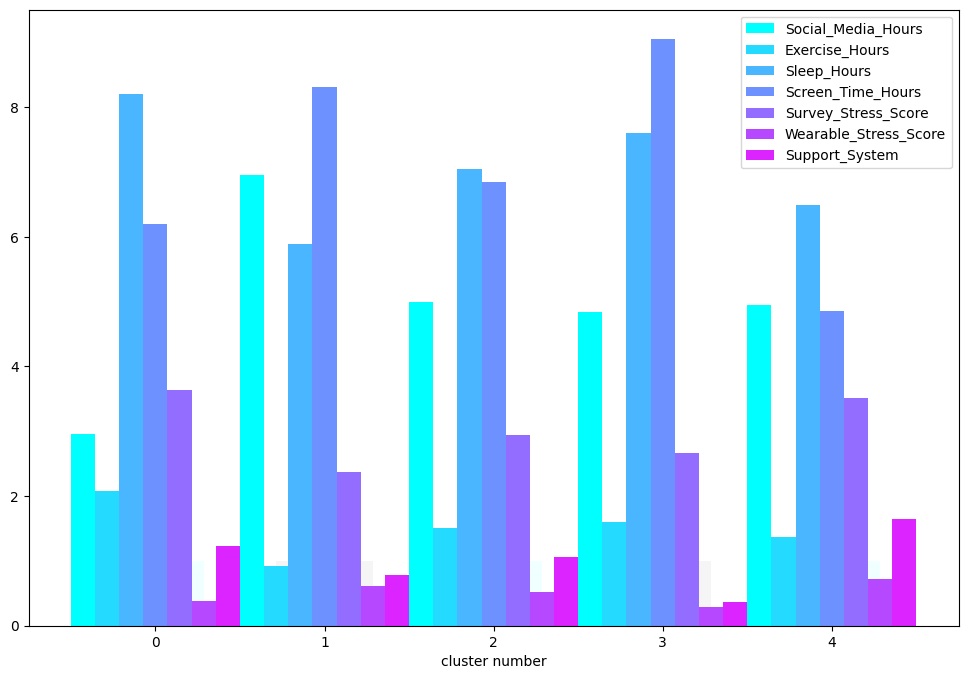

In [80]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
print("============")
print(labels, len(labels))
print("============")
x["cluster"] = labels

#Pick some features to plot
# Social_Media_Hours,
# Exercise_Hours,
# Sleep_Hours,
# Screen_Time_Hours,
# Survey_Stress_Score,
# Wearable_Stress_Score,
# Support_System
features = ['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score', 'Support_System']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["cluster"]==i][f]) for i in range(k)]

    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2

    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))

ax.legend()
ax.set_xlabel("cluster number")

In [81]:
pd.DataFrame(x[x['cluster'] == 0])

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
12,13,18,F,3.783156,2.958951,6.609755,7.382772,4,0.134476,1.0,Good,0
16,17,18,M,6.296836,2.329174,9.315296,6.778830,4,0.398878,2.0,Excellent,0
21,22,13,F,2.814773,2.499628,8.292119,5.657005,3,0.737012,1.0,Excellent,0
24,25,18,M,1.203781,2.669206,8.277753,6.790270,2,0.139542,1.0,Poor,0
30,31,15,M,7.085835,2.863913,8.755523,10.654170,5,0.126797,2.0,Average,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4982,13,F,2.022732,2.693116,4.693377,8.366729,3,0.338512,2.0,Excellent,0
4982,4983,18,F,2.139338,2.939075,9.055763,10.807650,4,0.835300,1.0,Poor,0
4983,4984,17,F,0.058038,1.942979,9.957790,2.349136,4,0.772900,2.0,Excellent,0
4987,4988,13,F,2.024675,2.990288,9.622918,5.724046,4,0.761595,2.0,Good,0


In [82]:
pd.DataFrame(x[x['cluster'] == 1])

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,1.0,Excellent,1
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,1.0,Poor,1
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,1.0,Average,1
6,7,15,F,9.643532,2.290941,4.790720,8.860167,4,0.953354,0.0,Excellent,1
13,14,17,M,0.883970,0.265705,4.671838,3.782933,1,0.200335,0.0,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4990,15,F,5.024028,2.047925,4.345551,4.542949,1,0.570949,0.0,Good,1
4990,4991,15,F,9.169787,0.758509,5.014431,2.219305,2,0.665527,0.0,Average,1
4991,4992,17,F,7.067653,1.175943,8.527583,11.477875,1,0.500175,2.0,Good,1
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,1.0,Excellent,1


In [83]:
pd.DataFrame(x[x['cluster'] == 2])

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,1.0,Good,2
11,12,15,F,8.159558,2.827031,6.709820,4.821116,3,0.559666,0.0,Good,2
17,18,18,F,4.161609,1.787780,5.408101,10.147018,5,0.763002,0.0,Good,2
19,20,16,M,9.861768,2.272529,4.320500,7.586530,4,0.336043,2.0,Poor,2
20,21,17,M,8.208490,0.353937,7.649786,2.027510,4,0.164438,1.0,Average,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4977,4978,15,M,5.973493,0.751504,4.820700,5.483875,3,0.002489,2.0,Good,2
4980,4981,18,F,4.336969,0.679382,7.697780,4.175053,2,0.243548,2.0,Average,2
4985,4986,15,F,7.489176,1.928226,6.722019,6.105994,2,0.612977,1.0,Good,2
4993,4994,18,M,0.850436,1.309462,4.799312,10.240993,5,0.499636,2.0,Good,2


In [84]:
pd.DataFrame(x[x['cluster'] == 3])

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
5,6,14,M,9.774382,1.046108,9.282089,5.677747,5,0.070586,0.0,Poor,3
8,9,15,M,2.994231,1.053651,6.963850,7.252061,5,0.117732,0.0,Poor,3
9,10,17,M,1.001550,2.511720,5.658463,10.904165,2,0.183585,1.0,Good,3
15,16,16,F,9.813833,1.117202,8.926471,8.475951,4,0.109301,0.0,Average,3
32,33,16,F,1.739637,2.092384,4.501980,8.189465,4,0.400840,0.0,Poor,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,4966,15,M,7.505240,0.800411,9.468367,8.741594,3,0.433627,0.0,Average,3
4971,4972,13,M,2.268705,0.192000,8.512477,6.438358,3,0.269918,0.0,Average,3
4972,4973,13,F,7.952870,0.408683,6.161642,10.265427,3,0.105451,0.0,Excellent,3
4984,4985,15,M,3.009577,2.750470,6.198089,10.287917,1,0.492248,1.0,Excellent,3


In [85]:
pd.DataFrame(x[x['cluster'] == 4])

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,2.0,Poor,4
7,8,15,F,1.637290,0.290854,4.733405,8.026163,4,0.910201,1.0,Poor,4
10,11,16,M,2.717176,0.200391,7.412368,2.031673,1,0.311596,2.0,Excellent,4
18,19,14,F,1.665385,1.933097,4.680763,6.508862,5,0.888583,2.0,Average,4
23,24,14,M,0.566256,1.732025,8.078055,8.896887,1,0.980033,2.0,Poor,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4974,17,M,6.307797,0.543242,5.412681,5.389272,1,0.859074,2.0,Good,4
4978,4979,16,M,4.724621,1.113359,4.869453,4.043996,5,0.071965,2.0,Excellent,4
4992,4993,18,M,7.224334,1.937803,8.133359,2.163678,2,0.521693,2.0,Poor,4
4994,4995,13,F,2.199911,0.751638,7.012387,3.691376,5,0.496817,2.0,Average,4


In [86]:
x

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,cluster
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,1.0,Excellent,1
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,1.0,Good,2
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,1.0,Poor,1
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,1.0,Average,1
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,2.0,Poor,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,1.0,Average,2
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,1.0,Excellent,1
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,2.0,Good,0
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,2.0,Average,1


Create a composite chart with violin, scatter and box plots to visualise the distribution of data across different categories

[[1.00000000e+00 1.60000000e+01 9.65448635e+00 ... 2.88962247e-01
  1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.70000000e+01 9.15814348e+00 ... 4.09446165e-01
  1.00000000e+00 2.00000000e+00]
 [3.00000000e+00 1.50000000e+01 5.02875520e+00 ... 4.23837485e-01
  1.00000000e+00 1.00000000e+00]
 ...
 [4.99800000e+03 1.40000000e+01 3.44438288e+00 ... 2.89331800e-03
  2.00000000e+00 0.00000000e+00]
 [4.99900000e+03 1.80000000e+01 7.86652516e+00 ... 6.12063176e-01
  2.00000000e+00 1.00000000e+00]
 [5.00000000e+03 1.80000000e+01 3.38936220e+00 ... 9.52662475e-01
  1.00000000e+00 4.00000000e+00]]
0 category0 [ 1.         16.          9.65448635  2.45800126  5.19892552  8.158189
  3.          0.28896225  1.          1.        ]
1 category1 [ 2.         17.          9.15814348  0.39209476  8.86609666  5.15199347
  5.          0.40944616  1.          2.        ]
2 category2 [ 3.         15.          5.0287552   0.52011947  4.94309483  9.20932548
  2.          0.42383749  1.          1.       

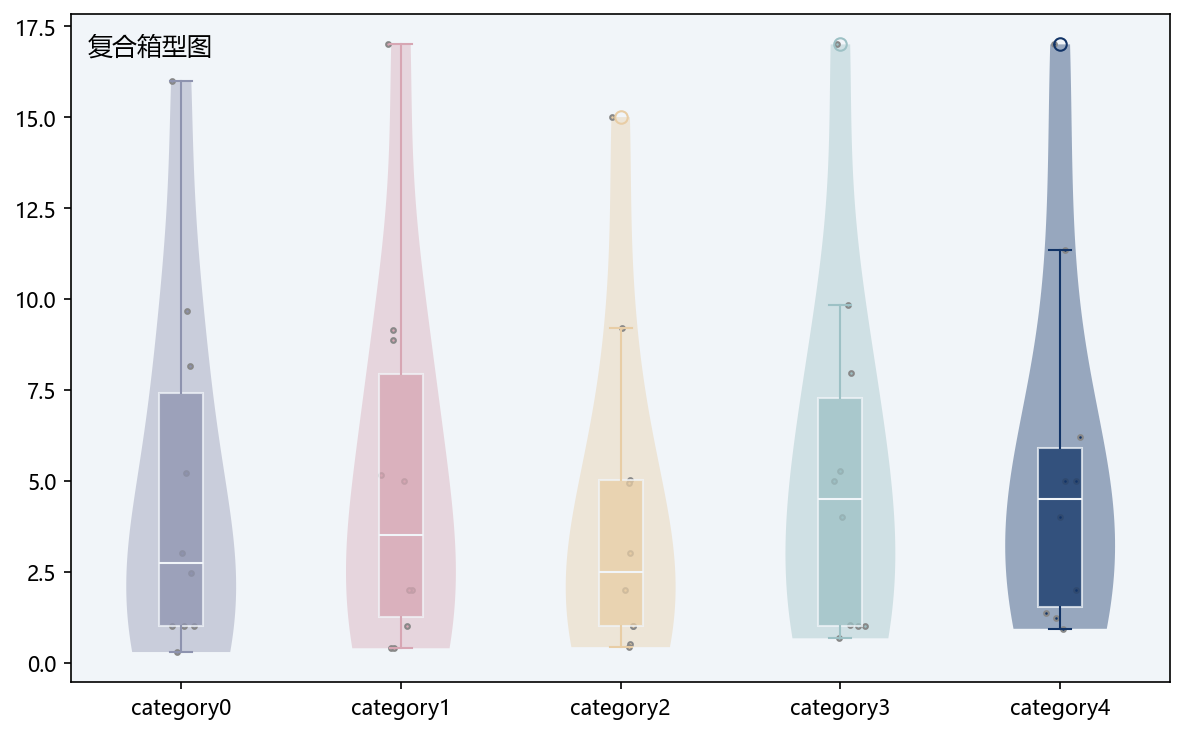

In [ ]:
categories = ["category0", "category1", "category2", "category3", "category4"]

features = ['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours',
            'Survey_Stress_Score', 'Wearable_Stress_Score', 'Support_System']
x = x.drop("Academic_Performance", axis=1)
x = x.drop("Gender", axis=1)
try:
    plt.style.use("premium.mplstyle")
except:
    pass
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["axes.facecolor"] = "#f1f5f9"

colors = ["#8e93af", "#d7a6b3", "#e8cda5", "#9dc1c5", "#123467"]

fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
x_offset = 0.0
print(x.values)
for i, (category, subset) in enumerate(zip(categories, x.values)):
    print(i, category, subset)
    parts = ax.violinplot(subset, positions=[i + x_offset],
                          showmeans=False,
                          showmedians=False,
                          showextrema=False)
    for pc in parts["bodies"]:
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.4)
    jitter = np.random.normal(0, 0.04, size=subset.shape)
    ax.scatter(np.full(subset.shape, i + x_offset) + jitter, subset,
               color=colors[i], edgecolor="#888888", s=5)
    ax.boxplot(subset, positions=[i], widths=0.2, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color="#f1f5f9", alpha=0.75),
               capprops=dict(color=colors[i]),
               whiskerprops=dict(color=colors[i]),
               flierprops=dict(markeredgecolor=colors[i]),
               medianprops=dict(color="#f1f5f9"))

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_title("Composite Box Diagram", x=0.015, y=0.95, ha="left", va="top")
plt.tight_layout()
plt.show()


In [35]:
x_scaled

array([[ 1.65486941,  1.09835642, -1.07921162, ..., -0.01116908,
        -0.71669835, -0.01230263],
       [ 1.48093631, -1.2656595 ,  1.05034024, ...,  1.40263795,
        -0.30086291, -0.01230263],
       [ 0.0338776 , -1.11916088, -1.22777429, ..., -0.71807259,
        -0.25119304, -0.01230263],
       ...,
       [-0.52133291,  1.57892843,  1.26034081, ...,  0.69573444,
        -1.70403012,  1.21796004],
       [ 1.02831539,  1.02722423, -1.59086956, ..., -0.71807259,
         0.39844482,  1.21796004],
       [-0.54061378, -0.14018188,  0.94992082, ...,  1.40263795,
         1.57398146, -0.01230263]], shape=(5000, 7))

In [37]:
x

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,cluster
0,1,16,9.654486,2.458001,5.198926,8.158189,3,0.288962,1.0,1
1,2,17,9.158143,0.392095,8.866097,5.151993,5,0.409446,1.0,2
2,3,15,5.028755,0.520119,4.943095,9.209325,2,0.423837,1.0,1
3,4,17,7.951103,1.022630,5.262773,9.823658,5,0.666021,1.0,1
4,5,17,1.357459,1.225462,6.196080,11.338990,5,0.928060,2.0,4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,0.088148,1.003339,8.684888,5.922202,1,0.750205,1.0,2
4996,4997,15,7.161276,1.024644,5.312684,10.224924,4,0.427209,1.0,1
4997,4998,14,3.444383,2.877972,9.227726,4.059322,4,0.002893,2.0,0
4998,4999,18,7.866525,2.395839,4.317831,10.657076,2,0.612063,2.0,1


In [43]:
x

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,cluster
0,1,16,9.654486,2.458001,5.198926,8.158189,3,0.288962,1.0,1
1,2,17,9.158143,0.392095,8.866097,5.151993,5,0.409446,1.0,2
2,3,15,5.028755,0.520119,4.943095,9.209325,2,0.423837,1.0,1
3,4,17,7.951103,1.022630,5.262773,9.823658,5,0.666021,1.0,1
4,5,17,1.357459,1.225462,6.196080,11.338990,5,0.928060,2.0,4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,0.088148,1.003339,8.684888,5.922202,1,0.750205,1.0,2
4996,4997,15,7.161276,1.024644,5.312684,10.224924,4,0.427209,1.0,1
4997,4998,14,3.444383,2.877972,9.227726,4.059322,4,0.002893,2.0,0
4998,4999,18,7.866525,2.395839,4.317831,10.657076,2,0.612063,2.0,1


Processing of data frame x to remove specific columns

In [88]:
new_x_scaled = x.drop("User_ID", axis = 1)
new_x_scaled = new_x_scaled.drop("Age", axis = 1)
new_x_scaled.iloc[:,:7]
new_x_scaled["cluster"]

0       1
1       2
2       1
3       1
4       4
       ..
4995    2
4996    1
4997    0
4998    1
4999    4
Name: cluster, Length: 5000, dtype: int32

Fitting the data using a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(new_x_scaled.iloc[:,:7])
model.fit(new_x_scaled.iloc[:,:7], new_x_scaled["cluster"])  
print("Coefficients:", model.coef_)  


      Social_Media_Hours  Exercise_Hours  Sleep_Hours  Screen_Time_Hours  \
0               9.654486        2.458001     5.198926           8.158189   
1               9.158143        0.392095     8.866097           5.151993   
2               5.028755        0.520119     4.943095           9.209325   
3               7.951103        1.022630     5.262773           9.823658   
4               1.357459        1.225462     6.196080          11.338990   
...                  ...             ...          ...                ...   
4995            0.088148        1.003339     8.684888           5.922202   
4996            7.161276        1.024644     5.312684          10.224924   
4997            3.444383        2.877972     9.227726           4.059322   
4998            7.866525        2.395839     4.317831          10.657076   
4999            3.389362        1.375646     8.693171           6.977589   

      Survey_Stress_Score  Wearable_Stress_Score  Support_System  
0                   

In [94]:
model.predict([[1, 2, 3, 4, 5, 6, 7]])

E:\Anaconda\envs\jqxx\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.9948599])

Shows the relationship between x and y values, where y values are calculated from random numbers, linear terms and quadratic terms

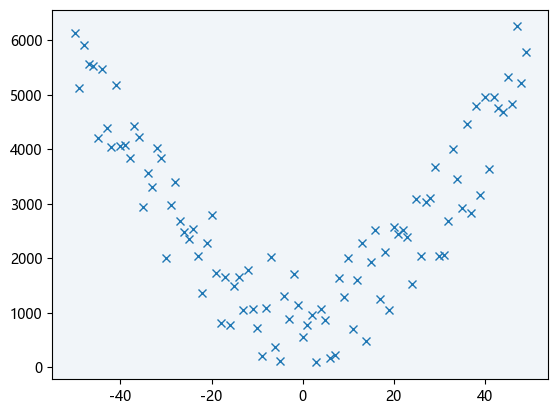

In [96]:
x = np.arange(100)-50
y = (np.random.random(100)*2000) + (0.5*x) + (2*x*x)
plt.plot(x,y,"x")

A one-way linear regression was performed between each feature and the target variable cluster and regression coefficients and R² values were calculated for each feature

In [ ]:
import numpy as np
from sklearn.metrics import  r2_score

#  Suppose x is the matrix (5000, 7) and y is the target variable (5000,).
for i in range(new_x_scaled.shape[1]-1):  
    feature_x = new_x_scaled.iloc[:, i]   
    coefficients = np.polyfit(feature_x, new_x_scaled["cluster"], deg=1)  
    poly_model = np.poly1d(coefficients)
    r2 = r2_score(new_x_scaled["cluster"], poly_model(feature_x))
    print(f"Feature {i}: Coefficients {coefficients}, r2 {r2}")


Feature 0: Coefficients [0.04622278 1.74902552], r2 0.009195468267530149
Feature 1: Coefficients [-0.19402001  2.26767124], r2 0.01519414082312498
Feature 2: Coefficients [-0.11042566  2.75631473], r2 0.019111223447587977
Feature 3: Coefficients [-0.03790625  2.24494524], r2 0.006312995546963074
Feature 4: Coefficients [-0.00401599  1.98911142], r2 1.7057978215162528e-05
Feature 5: Coefficients [0.78279351 1.58825065], r2 0.027187680496900346
Feature 6: Coefficients [0.09933404 1.87667262], r2 0.003445585827673403
